In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the CSV Data as Pandas DataFrame

In [8]:
df = pd.read_excel('data.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Shape of the dataset
df.shape

(302, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
df.duplicated().sum()

0

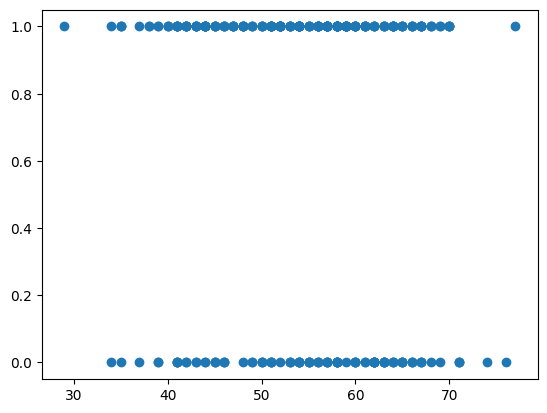

In [14]:
plt.scatter(df.age,df.sex)

# Age V/S Cholesterol

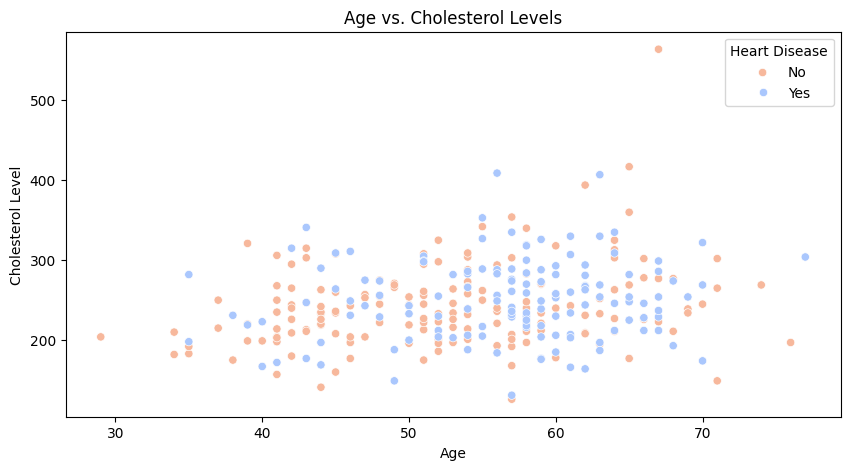

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm')
plt.title('Age vs. Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

C:\Users\Darshan Patel\AppData\Local\Temp\ipykernel_15468\3704574512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='thalach', palette='coolwarm')


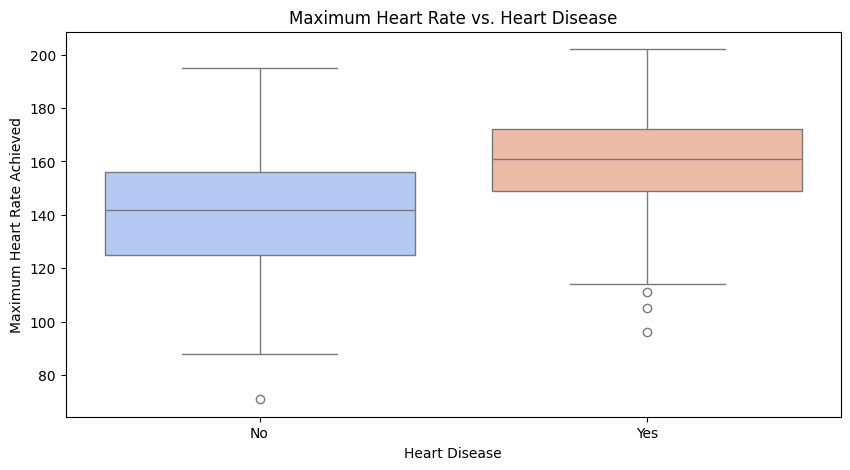

In [28]:
# 2. Maximum Heart Rate vs. Target
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='target', y='thalach', palette='coolwarm')
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

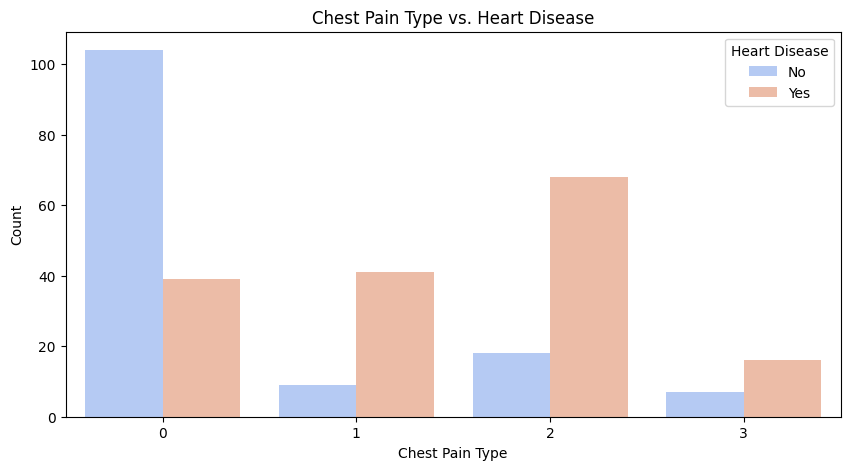

In [29]:
# 3. Chest Pain Type vs. Target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cp', hue='target', palette='coolwarm')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [30]:
x = df.drop('target',axis=1)
y = df.target

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)

C:\Users\Darshan Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(x_test,y_test)

0.8351648351648352

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [40]:
paramer = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
}

In [41]:
from sklearn.model_selection import GridSearchCV
gv = GridSearchCV(tree,param_grid=paramer,cv=5)

In [42]:
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [43]:
gv.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=3, splitter='random')

In [44]:
gv.best_params_

{'criterion': 'log_loss', 'max_depth': 3, 'splitter': 'random'}

In [45]:
gv.best_score_

0.8007751937984496

In [46]:
gv.score(x_test,y_test)

0.7692307692307693

In [49]:
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [50]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index([], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object'))])

In [52]:
# separate dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((241, 13), (61, 13))

In [53]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [54]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [58]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8589
- F1 score: 0.8585
- Precision: 0.8551
- Recall: 0.8939
- Roc Auc Score: 0.8552
----------------------------------
Model performance for Test set
- Accuracy: 0.8361
- F1 score: 0.8362
- Precision: 0.8667
- Recall: 0.8125
- Roc Auc Score: 0.8373


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8197
- F1 score: 0.8192
- Precision: 0.8889
- Recall: 0.7500
- Roc Auc Score: 0.8233


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8852
- F1 score: 0.8853
- Precision: 0.9032
- Recall: 0.8750
- Roc Auc Score: 0.8858


Gradient Boost
Model performance for Training se

In [59]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [60]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params)
                   
]

In [61]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  {'learni

In [62]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Darshan Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Darshan Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Darshan Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Darshan Patel\AppData\Local\Programs\Python\Python311\

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 20, 'max_features': 5, 'max_depth': 5}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.4}


In [69]:
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score

In [70]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    "Xgboost":XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    y_test_pred = model.predict(X_test)

    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Test set
- Accuracy: 0.8689
- F1 score: 0.8689
- Precision: 0.9000
- Recall: 0.8438
- Roc Auc Score: 0.8702


Xgboost
Model performance for Test set
- Accuracy: 0.8361
- F1 score: 0.8362
- Precision: 0.8667
- Recall: 0.8125
- Roc Auc Score: 0.8373




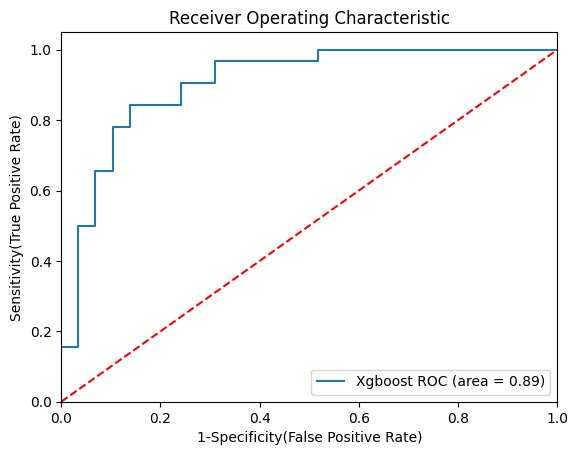

In [71]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,
                           colsample_bytree=1),
    'auc':  0.8882
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 